In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/real_estate_ads_2022_10.csv')
df

,id,market,created_at_first,updated_at,district_lon,district_lat,title,description,params,price,no_rooms,m,price_per_m,map_lon,map_lat
0,58668640,secondary,2019-04-09 16:12:54.000,2019-04-15 18:54:38.000,16.90502,52.41180,Mieszkanie z potencjałem. Rynek Jeżycki.,<p>Zapraszam do zakupu mieszkania zlokalizowan...,price<=>price<br>price<=>260000<br>price[curre...,260000.0,2,51.00,5098.04,16.896592,52.410150
1,58887800,secondary,2019-04-25 17:20:01.000,2019-05-27 11:36:14.000,16.87466,52.41572,Okazja Jeżyce!!!!!,<p>Polecam na sprzedaż mieszkanie kawalerka o ...,price<=>price<br>price<=>155000<br>price[curre...,155000.0,1,26.00,5961.54,16.904410,52.411919
2,55129916,secondary,2018-08-02 16:40:35.000,2021-11-28 01:56:53.000,16.90502,52.41180,"**Okazja * 60,1m2 * 3 pokoje * poddasze * Jeży...",<p> **Przestronne mieszkanie 3 pokojowe * na ...,price<=>price<br>price<=>280000<br>price[curre...,280000.0,3,60.10,4658.90,16.899310,52.413357
3,60011531,secondary,2019-12-05 12:45:49.000,2020-01-15 16:05:42.000,16.87466,52.41572,"Mieszkanie 2-pokojowe, Ogrody, Kampus Uam",<p>Serdecznie zapraszam do zapoznania się z of...,price<=>price<br>price<=>339000<br>price[curre...,339000.0,2,47.00,7212.77,16.883608,52.410662
4,60096194,secondary,2020-01-10 14:53:19.000,2020-02-13 15:25:07.000,16.87466,52.41572,Jeżyce 2 pokoje,<p>Polecam na sprzedaż mieszkanie z komórka lo...,price<=>price<br>price<=>325000<br>price[curre...,325000.0,2,44.00,7386.36,16.890796,52.412308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73640,59477668,secondary,2019-07-16 22:38:08.000,2019-10-14 23:01:42.000,16.94080,52.38356,Poznań - Rataje idealny układ pomieszczeń.,"<p>Drodzy Państwo,</p>\r\n<p>Zapraszam do zapo...",price<=>price<br>price<=>347000<br>price[curre...,347000.0,3,47.00,7382.98,16.955818,52.389898
73641,59479003,secondary,2019-07-17 11:18:30.000,2019-08-07 14:22:54.000,16.94080,52.38356,2 pokojowe z balkonem RATAJE os. Piastowskie,<p>Polecam na sprzedaż mieszkanie 2 pokojowe u...,price<=>price<br>price<=>299000<br>price[curre...,299000.0,2,43.70,6842.11,16.947615,52.392968
73642,59474988,secondary,2019-07-16 13:40:35.000,2019-07-23 00:30:42.000,16.90590,52.36596,"Inwestycyjne 2 niezależne pokoje, do wykończenia.",<p>Na sprzedaż przestronne mieszkanie położone...,price<=>price<br>price<=>270000<br>price[curre...,270000.0,2,45.32,5957.63,16.904862,52.369679
73643,59428272,secondary,2019-07-03 20:50:27.000,2022-06-17 17:14:34.000,16.94080,52.38356,Przestronna kawalerka z dużym tarasem Chartowo...,<p>Kontakt w sprawie oferty - Katarzyna Piotro...,price<=>price<br>price<=>229000<br>price[curre...,229000.0,1,36.30,6308.54,16.980725,52.389168


## Plot correlation matrix between variables

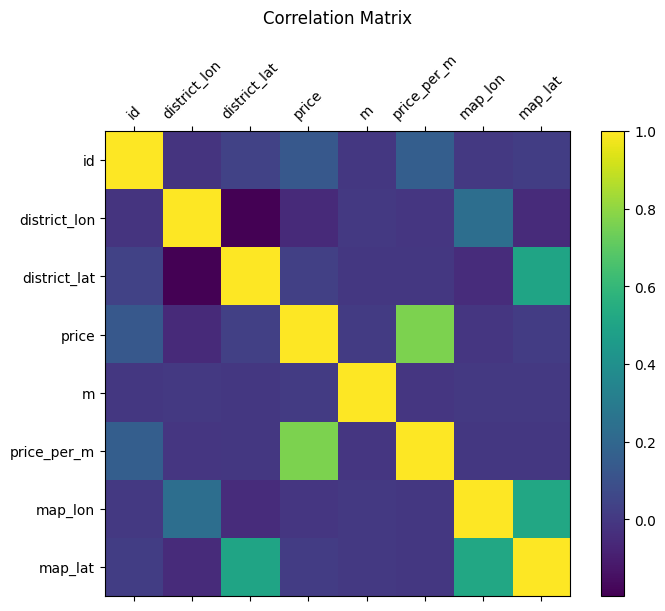

In [3]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
plt.matshow(corr_matrix, fignum=1)
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Correlation Matrix', pad=20)
plt.show()

## See the types of the variables

In [10]:
df.dtypes

id                    int64
market               object
created_at_first     object
updated_at           object
district_lon        float64
district_lat        float64
title                object
description          object
params               object
price               float64
no_rooms             object
m                   float64
price_per_m         float64
map_lon             float64
map_lat             float64
dtype: object

We will need to transform the "object" types with some heuristics (one-hot, ... This will be studied in the extract_features notebooks, and implemented in the src/data_preprocessing.py class)

## Dropping some features
For training a model, it is clear that we should delete the IDs, as well as "prices", since "price_per_m" can be trivially computed by "m" and "price",creating a data leakeage.

In [ ]:
X = df.drop(columns=['price', 'price_per_m', 'id'])
Y = df[['price_per_m']]

df = pd.concat([X, Y], axis=1)

## Studying the label distribution

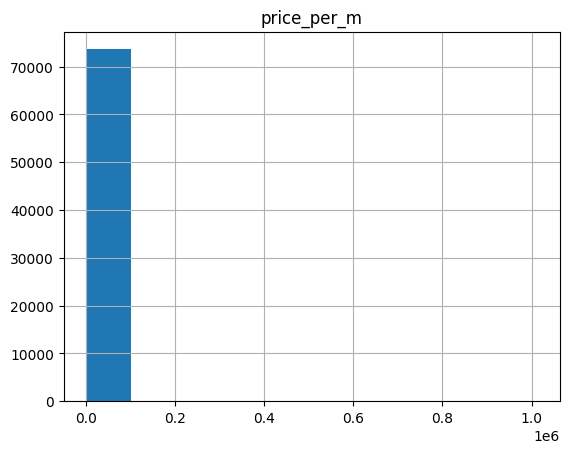

In [ ]:
Y.hist()
plt.show()

Y.to_csv("y.csv")

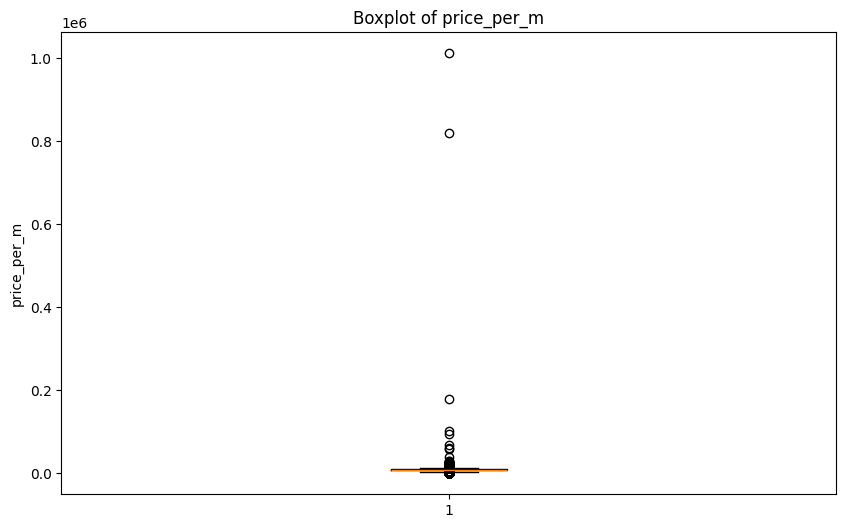

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot(Y['price_per_m'])
plt.title('Boxplot of price_per_m')
plt.ylabel('price_per_m')
plt.show()

In [ ]:
# Check for missing values
missing_values = Y.isnull().sum()
missing_values

price_per_m    0
dtype: int64

In [ ]:
# Calculate descriptive statistics
descriptive_stats = Y.describe()
descriptive_stats

,price_per_m
count,7.364500e+04
mean,8.232007e+03
std,5.267824e+03
min,1.000000e-02
25%,6.950000e+03
50%,7.903230e+03
75%,9.153750e+03
max,1.012400e+06


In [ ]:
# Identify outliers using the IQR method
Q1 = Y.quantile(0.25)
Q3 = Y.quantile(0.75)
IQR = Q3 - Q1
outliers = Y[((Y < (Q1 - 1.5 * IQR)) | (Y> (Q3 + 1.5 * IQR))).any(axis=1)]
outliers

,price_per_m
30,14433.10
34,14028.12
35,16363.64
132,14727.50
161,705.88
...,...
73443,12500.00
73470,15000.00
73493,14157.90
73534,2738.10


In [ ]:
len(outliers) / len(Y)

0.04330232873922194

## Log-transform the price_per_m feature

In [ ]:
from scipy.stats import skew
import numpy as np

# Calculate skewness of the original data
original_skewness = skew(Y['price_per_m'])
print(f"Skewness of original data: {original_skewness}")

# Calculate skewness of the log-transformed data
Y["log_price_per_m"] = Y['price_per_m'].apply(lambda x: np.log(x))
log_skewness = skew(Y['log_price_per_m'])
print(f"Skewness of log-transformed data: {log_skewness}")

Skewness of original data: 144.72949296257303
Skewness of log-transformed data: -15.870393338591466


C:\Users\sergi\AppData\Local\Temp\ipykernel_149388\3352538793.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y["log_price_per_m"] = Y['price_per_m'].apply(lambda x: np.log(x))


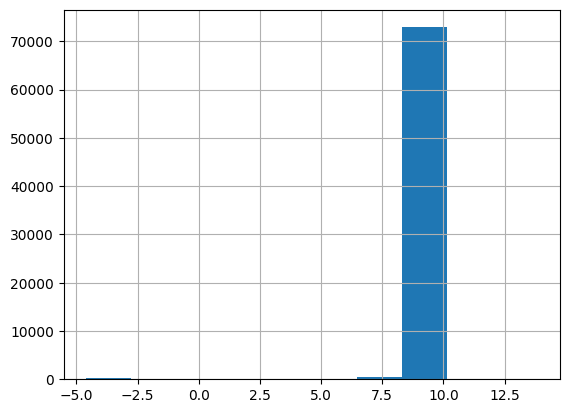

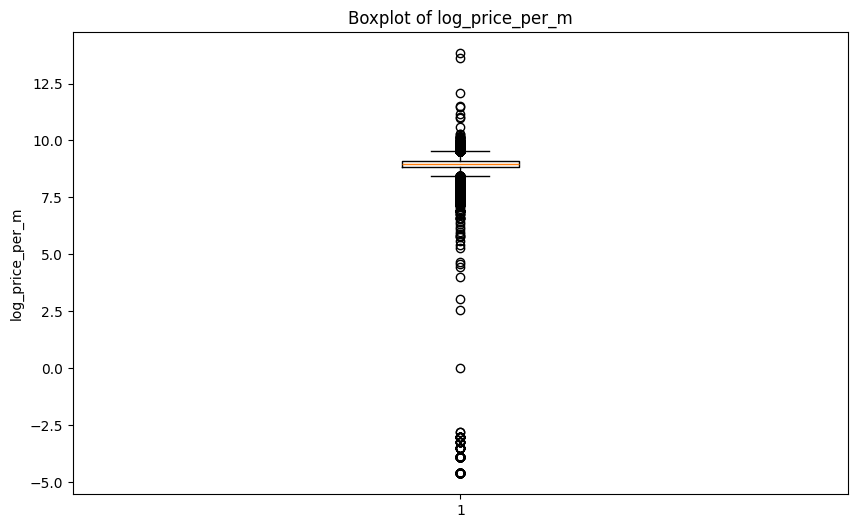

In [ ]:
Y['log_price_per_m'].hist()
plt.show()

plt.figure(figsize=(10, 6))
plt.boxplot(Y['log_price_per_m'])
plt.title('Boxplot of log_price_per_m')
plt.ylabel('log_price_per_m')
plt.show()

## Try out more transformations

In [ ]:
from scipy.stats import boxcox, skew
from sklearn.preprocessing import PowerTransformer
import numpy as np

# Applying Square Root Transformation
Y.loc[:, 'sqrt_price_per_m'] = Y['price_per_m'].apply(lambda x: np.sqrt(x) if x > 0 else 0)

# Applying Cube Root Transformation
Y.loc[:, 'cbrt_price_per_m'] = Y['price_per_m'].apply(lambda x: np.cbrt(x) if x > 0 else 0)

# Applying Box-Cox Transformation
Y.loc[:, 'boxcox_price_per_m'], _ = boxcox(Y['price_per_m'] + 1)  # Adding 1 to avoid log(0) issues

# Applying Yeo-Johnson Transformation
pt = PowerTransformer(method='yeo-johnson')
Y.loc[:, 'yeo_price_per_m'] = pt.fit_transform(Y[['price_per_m']])

# Recalculate skewness for all transformations
sqrt_skewness = skew(Y['sqrt_price_per_m'])
cbrt_skewness = skew(Y['cbrt_price_per_m'])
boxcox_skewness = skew(Y['boxcox_price_per_m'])
yeo_skewness = skew(Y['yeo_price_per_m'])

sqrt_skewness, cbrt_skewness, boxcox_skewness, yeo_skewness


(8.35283082539883, -0.7515693597937954, 4.159837766201554, 4.159837350969974)

The best candidate seems to be a cubic transformation

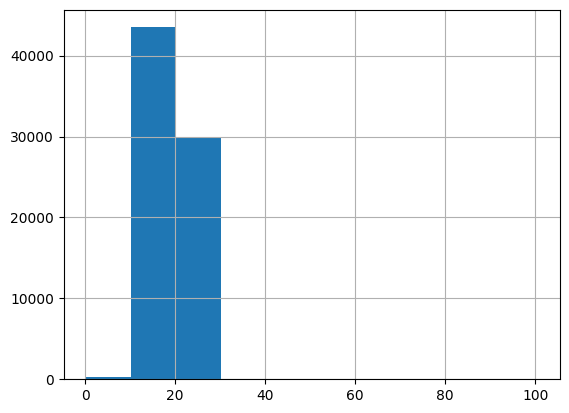

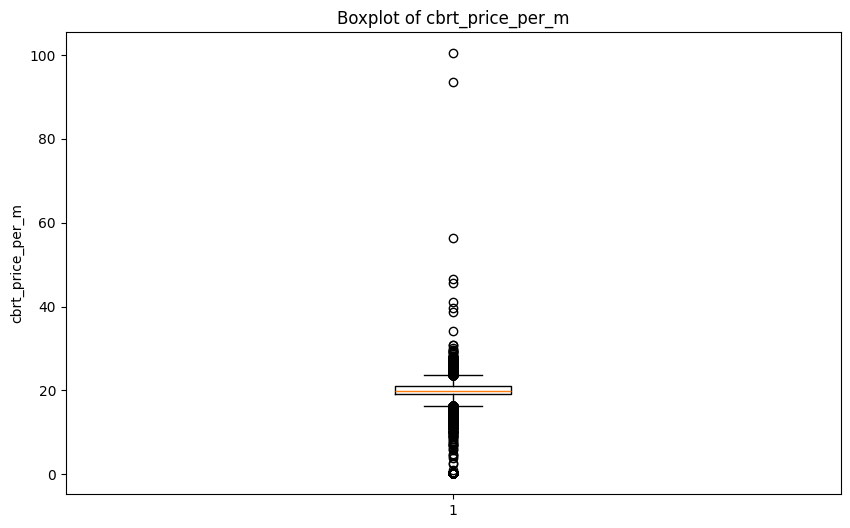

In [ ]:
Y['cbrt_price_per_m'].hist()
plt.show()

plt.figure(figsize=(10, 6))
plt.boxplot(Y['cbrt_price_per_m'])
plt.title('Boxplot of cbrt_price_per_m')
plt.ylabel('cbrt_price_per_m')
plt.show()

## Standard scale the data

In [ ]:
from sklearn.preprocessing import StandardScaler
import pickle as pkl

scaler = StandardScaler()
Y.loc[:,'standardized_cbrt_price_per_m'] = scaler.fit_transform(Y[['cbrt_price_per_m']])

with open('../data/standard_scaler_cbrt_price_per_m.pkl', 'wb') as file:
    pkl.dump(scaler, file)

<Axes: >

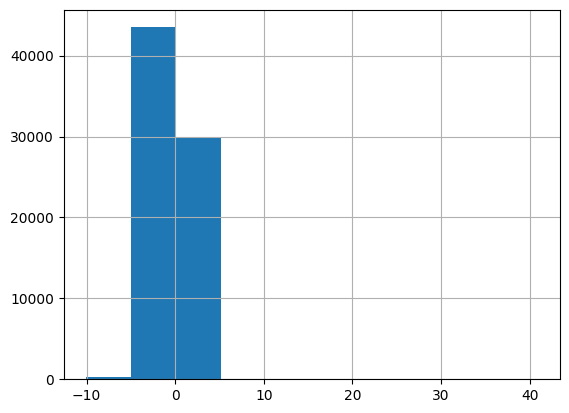

In [ ]:
Y["standardized_cbrt_price_per_m"].hist()

## Define an inverse transformation

In [ ]:
def inverse_transform(data):

    inverse_scale = scaler.inverse_transform(data)
    inverse_cbrt = np.power(inverse_scale, 3)

    return inverse_cbrt


In [ ]:
inverse_tr = inverse_transform(Y[['standardized_cbrt_price_per_m']])
df['inverse_tr'] = inverse_tr

In [ ]:
df[["inverse_tr", "price_per_m"]]

,inverse_tr,price_per_m
0,5098.04,5098.04
1,5961.54,5961.54
2,4658.90,4658.90
3,7212.77,7212.77
4,7386.36,7386.36
...,...,...
73640,7382.98,7382.98
73641,6842.11,6842.11
73642,5957.63,5957.63
73643,6308.54,6308.54
